# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import key_dict
owm_key = key_dict['open_weather']

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../expected_output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
# units = 'imperial'
city_data = []

print('Beginning Data Retrieval')
print('-----------------------------')

record_count = 1
set_count = 1

#--For testing--
# sub_cities = cities[0:3]
# query_url = f'{url}appid={owm_key}&{units}&q='
# response = requests.get(query_url + city).json()
# pprint(response)

for city in cities:
    
    query_url = f'{url}appid={owm_key}&units=imperial&q='
    
    try:
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
        response = requests.get(query_url + city).json()
        
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        
        city_data.append({'City': city,
                         'Lat': lat,
                         'Lng': lon,
                         'Max Temp': max_temp,
                         'Humidity': humidity,
                         'Cloudiness': cloudiness,
                         'Wind Speed': wind_speed,
                         'Country': country,
                         'Date': date})
        
        record_count += 1
        if (record_count > 50):
            set_count += 1
            record_count = 0
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | junction city
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | solano
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | kegayli
City not found. Skipping...
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | trelew
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | barentsbu

Processing Record 21 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 21 of Set 4 | castro
Processing Record 22 of Set 4 | mayumba
Processing Record 23 of Set 4 | paamiut
Processing Record 24 of Set 4 | mareeba
Processing Record 25 of Set 4 | rzeszow
Processing Record 26 of Set 4 | vernon
Processing Record 27 of Set 4 | tasiilaq
Processing Record 28 of Set 4 | airai
Processing Record 29 of Set 4 | nikolayevsk-na-amure
Processing Record 30 of Set 4 | antofagasta
Processing Record 31 of Set 4 | nouadhibou
Processing Record 32 of Set 4 | huilong
Processing Record 33 of Set 4 | lavumisa
Processing Record 34 of Set 4 | vila velha
Processing Record 35 of Set 4 | riyadh
Processing Record 36 of Set 4 | svobodnyy
Processing Record 37 of Set 4 | tambun
Processing Record 38 of Set 4 | santa barbara
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | luanda
Processing Record 41 of Set 4 | iwaki
Processing Record 42 of Set 4 | clyde river
Processing Record 43

Processing Record 46 of Set 7 | rumford
Processing Record 47 of Set 7 | ancud
Processing Record 48 of Set 7 | gilgil
City not found. Skipping...
Processing Record 48 of Set 7 | vanavara
Processing Record 49 of Set 7 | arawa
Processing Record 50 of Set 7 | huancavelica
Processing Record 0 of Set 8 | aksu
Processing Record 1 of Set 8 | baracoa
Processing Record 2 of Set 8 | gat
Processing Record 3 of Set 8 | newport
Processing Record 4 of Set 8 | mizan teferi
Processing Record 5 of Set 8 | tiznit
Processing Record 6 of Set 8 | van buren
Processing Record 7 of Set 8 | lalibela
Processing Record 8 of Set 8 | laguna
Processing Record 9 of Set 8 | passos
Processing Record 10 of Set 8 | ishigaki
Processing Record 11 of Set 8 | jinchang
Processing Record 12 of Set 8 | thinadhoo
Processing Record 13 of Set 8 | dunbar
Processing Record 14 of Set 8 | arlit
Processing Record 15 of Set 8 | buraydah
Processing Record 16 of Set 8 | tual
Processing Record 17 of Set 8 | ulety
Processing Record 18 of Se

Processing Record 24 of Set 11 | camacha
Processing Record 25 of Set 11 | lavrentiya
Processing Record 26 of Set 11 | urengoy
Processing Record 27 of Set 11 | benavente
Processing Record 28 of Set 11 | bossier city
Processing Record 29 of Set 11 | coahuayana
Processing Record 30 of Set 11 | socorro
Processing Record 31 of Set 11 | tianpeng
Processing Record 32 of Set 11 | moose factory
Processing Record 33 of Set 11 | hatillo
Processing Record 34 of Set 11 | stokmarknes
Processing Record 35 of Set 11 | beinamar
Processing Record 36 of Set 11 | yumen
Processing Record 37 of Set 11 | ottawa
Processing Record 38 of Set 11 | najran
Processing Record 39 of Set 11 | nelson bay
Processing Record 40 of Set 11 | barcelos
Processing Record 41 of Set 11 | honiara
Processing Record 42 of Set 11 | mutsamudu
City not found. Skipping...
Processing Record 42 of Set 11 | basco
Processing Record 43 of Set 11 | jabiru
City not found. Skipping...
Processing Record 43 of Set 11 | kamina
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file, encoding='utf-8')

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,80.51,67,100,8.55,PF,1615944433
1,junction city,39.0286,-96.8314,55.00,71,75,13.80,US,1615944433
2,avarua,-21.2078,-159.7750,84.20,74,20,8.05,CK,1615944434
3,los llanos de aridane,28.6585,-17.9182,64.40,63,20,10.36,ES,1615944434
4,solano,38.2333,-121.9511,57.20,47,1,10.36,US,1615944435
...,...,...,...,...,...,...,...,...,...
566,yarada,17.6500,83.2667,79.12,72,0,4.59,IN,1615944655
567,ostrovnoy,68.0531,39.5131,7.93,95,90,12.01,RU,1615944655
568,pak phanang,8.3511,100.2020,78.80,89,20,4.72,TH,1615944656
569,severodvinsk,64.5635,39.8302,28.40,93,90,2.24,RU,1615944656


In [5]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.582228,16.680217,52.870455,73.359019,53.323993,7.361138,1.615945e+09
std,33.521427,91.326839,27.048366,19.831545,40.397391,5.489720,9.943458e+01
min,-54.800000,-179.166700,-41.310000,1.000000,0.000000,0.090000,1.615944e+09
25%,-6.243150,-66.825200,35.465000,65.000000,7.000000,3.440000,1.615944e+09
50%,26.326000,19.533300,59.400000,77.000000,68.000000,5.750000,1.615945e+09
75%,48.806350,98.484350,75.585000,88.000000,93.000000,10.305000,1.615945e+09
max,78.218600,179.316700,90.270000,100.000000,100.000000,48.340000,1.615945e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

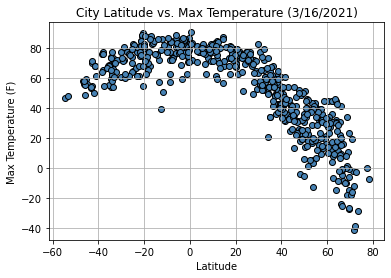

In [8]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (3/16/2021)')
plt.grid(True)
plt.savefig('../expected_output/Fig1_Lat_vs_Max_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

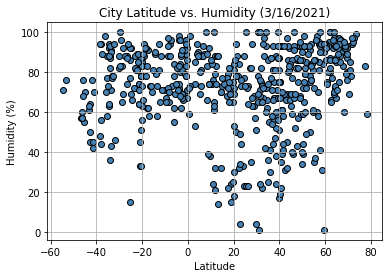

In [9]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (3/16/2021)')
plt.grid(True)
plt.savefig('../expected_output/Fig2_Lat_vs_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

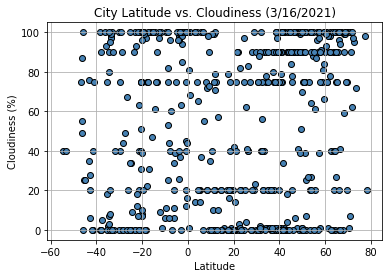

In [10]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (3/16/2021)')
plt.grid(True)
plt.savefig('../expected_output/Fig3_Lat_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

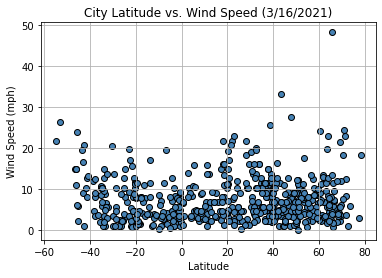

In [11]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (3/16/2021)')
plt.grid(True)
plt.savefig('../expected_output/Fig4_Lat_vs_Wind_Speed.png')
plt.show()

## Linear Regression

In [12]:
northern_hemisphere_df = city_data_df.loc[(city_data_df['Lat']) > 0, :]
northern_hemisphere_df
southern_hemisphere_df = city_data_df.loc[(city_data_df['Lat']) < 0, :]
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,80.51,67,100,8.55,PF,1615944433
2,avarua,-21.2078,-159.7750,84.20,74,20,8.05,CK,1615944434
8,hobart,-42.8794,147.3294,70.00,45,20,9.22,AU,1615944231
9,trelew,-43.2490,-65.3051,52.86,61,76,16.69,AR,1615944437
10,vao,-22.6667,167.4833,77.22,81,93,17.22,NC,1615944437
...,...,...,...,...,...,...,...,...,...
552,kamina,-8.7386,24.9906,62.22,97,100,3.56,CD,1615944650
555,namibe,-15.1961,12.1522,75.90,81,100,4.09,AO,1615944534
558,yulara,-25.2406,130.9889,78.80,15,0,12.66,AU,1615944652
565,campina verde,-19.5356,-49.4864,70.95,89,100,4.05,BR,1615944655


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88177479986862


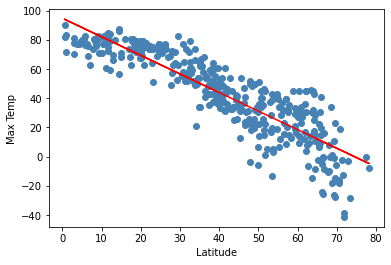

In [13]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Max Temp'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Max Temp'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(8,-50),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Max_Temp_vs_Lat.png')
plt.show()

In [14]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# In the northern hemisphere- as latitude increases, max temperature
# decreases. There is a strong correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5870464175966081


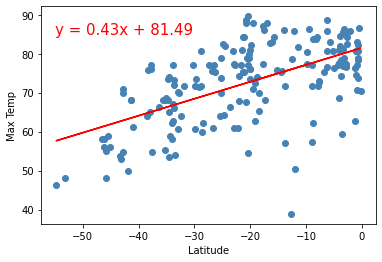

In [15]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Max Temp'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Max Temp'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-55, 85),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Max_Temp_vs_Lat.png')
plt.show()

In [16]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# In the southern hemisphere- as latitude decreases, max 
# temperature increases. There is a strong correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2561902851168438


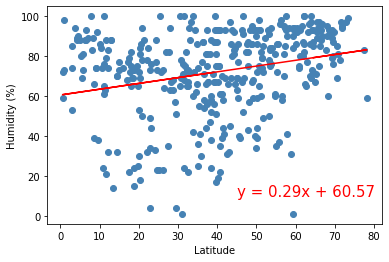

In [17]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Humidity'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Humidity'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Humidity_vs_Lat.png')
plt.show()

In [18]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# In the northern hemisphere- as latitude increases, percent 
# humidity increases. There is very little to no correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2568442457127316


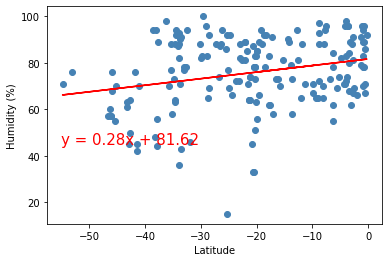

In [19]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Humidity'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Humidity'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Humidity_vs_Lat.png')
plt.show()

In [20]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3270870477340127


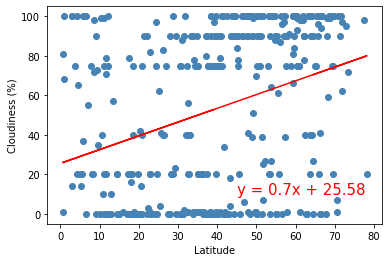

In [21]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Cloudiness'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Cloudiness'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Cloudiness_vs_Lat.png')
plt.show()

In [22]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25516114855595257


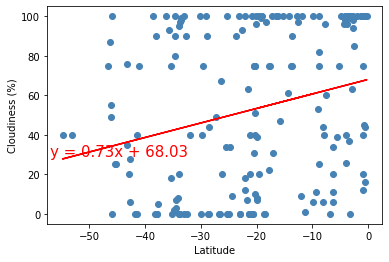

In [23]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Cloudiness'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Cloudiness'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-57,29),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Cloudiness_vs_Lat.png')
plt.show()

In [24]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.030394895022391226


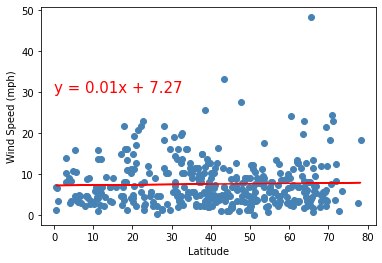

In [25]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Wind Speed'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Wind Speed'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Wind_Speed_vs_Lat.png')
plt.show()

In [26]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 
# We can say however that at all Northern latitudes Wind Speeds
# do not vary much from the linear regression model.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4111214925868212


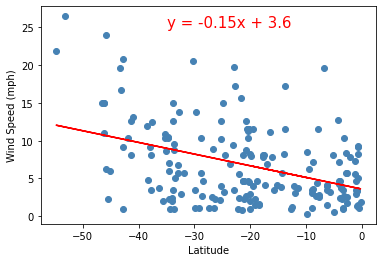

In [27]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Wind Speed'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Wind Speed'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-35,25),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Wind_Speed_vs_Lat.png')
plt.show()

In [28]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We can say that there is a weak correlation that follows the 
# linear regression model 